In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_city,job_state,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,"Data Scientist - Statistics, Early Career",$68K-$111K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310918\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Seattle, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,Pacific Northwest National Laboratory\n,Seattle,WA,0,54,0,0,0,0,1
1,Data Scientist II (Miami),$68K-$111K (Glassdoor est.),OfferUp is dedicated to building the simplest ...,3.4,OfferUp\n3.4,"Miami, FL","Bellevue, WA",201 to 500 employees,2011,Company - Private,...,OfferUp\n,Miami,FL,0,8,1,0,0,1,0
2,Data Scientist,$68K-$111K (Glassdoor est.),About Us\n\n\nInterested in working for a huma...,4.7,1904labs\n4.7,"Saint Louis, MO","Saint Louis, MO",51 to 200 employees,2016,Company - Private,...,1904labs\n,Saint Louis,MO,1,3,1,0,1,0,0
3,Data Scientist (Growth Marketing),$68K-$111K (Glassdoor est.),Auth0 is a pre-IPO unicorn. We are growing rap...,4.8,Auth0\n4.8,"America, AL","Bellevue, WA",501 to 1000 employees,2014,Company - Private,...,Auth0\n,America,AL,0,5,1,0,1,0,0
4,Data Scientist/Machine Learning,$68K-$111K (Glassdoor est.),"PulsePoint™, a global programmatic advertising...",4.4,PulsePoint\n4.4,"New York, NY","New York, NY",51 to 200 employees,2011,Company - Private,...,PulsePoint\n,New York,NY,1,8,1,0,1,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    
    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    490
mle                 7
director            3
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        439
senior     61
Name: seniority, dtype: int64

In [9]:
df.job_state.value_counts()

 CA               94
 VA               66
 NY               54
 MA               36
 IL               29
 TX               25
 DC               20
 MD               17
 WA               15
 OH               13
 FL               11
 PA               11
 NC                9
 AZ                8
 MI                8
 GA                8
 WI                8
 MO                8
 CO                8
 MN                6
 TN                6
United States      6
 NJ                5
 OR                3
 CT                3
 AL                3
 NM                2
New Jersey         2
 IN                2
Utah               2
 UT                2
 NE                2
 WV                2
New York State     1
Virginia           1
 OK                1
 KY                1
California         1
 NH                1
Name: job_state, dtype: int64

In [10]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      5278
1      3860
2      5020
3      4512
4      3741
       ... 
495    3460
496    2929
497    5081
498    4411
499    2527
Name: desc_len, Length: 500, dtype: int64

In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0      Oak Ridge National Laboratory, National Renewa...
1                                Letgo, 5miles, Facebook
2                   Slalom, Daugherty Business Solutions
3                                                     -1
4       Crossix Solutions Inc., AppNexus, The Trade Desk
                             ...                        
495                                                   -1
496                                                   -1
497                                                   -1
498                                                   -1
499                                                   -1
Name: Competitors, Length: 500, dtype: object

In [12]:
#hourly wage to annual

df['min _salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis= 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis= 1)

In [13]:
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,68,111
1,0,68,111
2,0,68,111
3,0,68,111
4,0,68,111
...,...,...,...
495,0,95,118
496,0,95,118
497,0,95,118
498,0,95,118


In [14]:
df['company_txt']=df.company_txt.apply(lambda x: x.replace('\n', ''))
df.company_txt

0      Pacific Northwest National Laboratory
1                                    OfferUp
2                                   1904labs
3                                      Auth0
4                                 PulsePoint
                       ...                  
495                           Prescient Edge
496                 Rainmaker Resources, LLC
497                    Good Shepherd Hospice
498                     NetImpact Strategies
499                          Radiant Digital
Name: company_txt, Length: 500, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,Employer Provided,min_salary,max_salary,avg_salary,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp,min _salary
count,500.000000,500.000000,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,3.489400,1578.656000,0.0,0.0,91.396000,140.492000,115.944000,0.370000,28.264000,0.806000,0.004000,0.304000,0.22400,0.426000,3420.364000,0.722000,91.396000
std,1.384262,801.300727,0.0,0.0,15.776977,24.637369,19.284363,0.483288,38.782502,0.395825,0.063182,0.460443,0.41734,0.494989,1604.654666,1.224629,15.776977
min,-1.000000,-1.000000,0.0,0.0,68.000000,109.000000,89.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,83.000000,0.000000,68.000000
25%,3.300000,1908.000000,0.0,0.0,79.000000,128.000000,104.500000,0.000000,3.750000,1.000000,0.000000,0.000000,0.00000,0.000000,2335.000000,0.000000,79.000000
50%,3.800000,1991.000000,0.0,0.0,89.000000,135.000000,112.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.00000,0.000000,3377.500000,0.000000,89.000000
75%,4.200000,2007.000000,0.0,0.0,106.000000,151.000000,121.500000,1.000000,37.000000,1.000000,0.000000,1.000000,0.00000,1.000000,4463.750000,1.000000,106.000000
max,5.000000,2019.000000,0.0,0.0,124.000000,198.000000,161.000000,1.000000,238.000000,1.000000,1.000000,1.000000,1.00000,1.000000,9162.000000,3.000000,124.000000


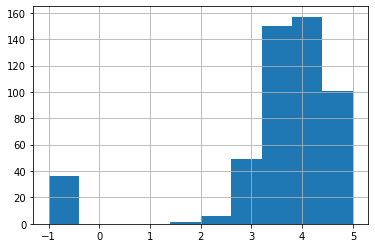

In [16]:
df.Rating.hist()

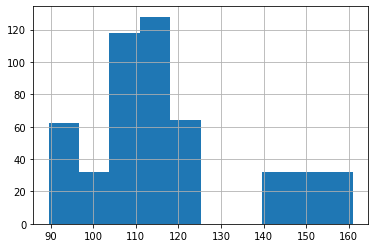

In [17]:
df.avg_salary.hist()

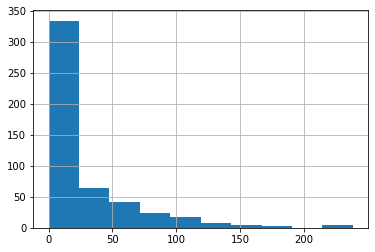

In [18]:
df.company_age.hist()

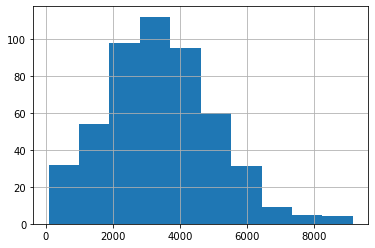

In [19]:
df.desc_len.hist()

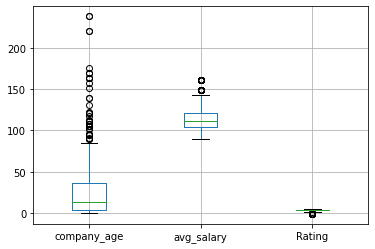

In [20]:
df.boxplot(column = ['company_age', 'avg_salary', 'Rating'])

In [21]:
df[['company_age', 'avg_salary', 'Rating', 'desc_len',"num_comp"]].corr()

,company_age,avg_salary,Rating,desc_len,num_comp
company_age,1.000000,0.034326,0.104685,0.192817,0.242861
avg_salary,0.034326,1.000000,-0.030971,-0.003304,-0.025227
Rating,0.104685,-0.030971,1.000000,0.116763,0.126050
desc_len,0.192817,-0.003304,0.116763,1.000000,0.205707
num_comp,0.242861,-0.025227,0.126050,0.205707,1.000000


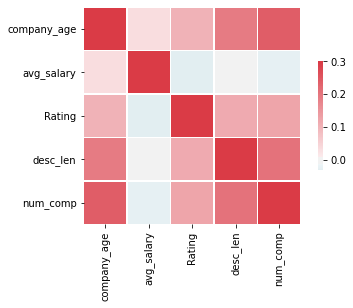

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['company_age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), vmax=.3, center=0,
           cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'min _salary'],
      dtype='object')

In [24]:
#Categorical Data
df_cat = df[['Location', 'Headquarters', 'Size',  'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state','python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority']]

graph for Location: total = 163


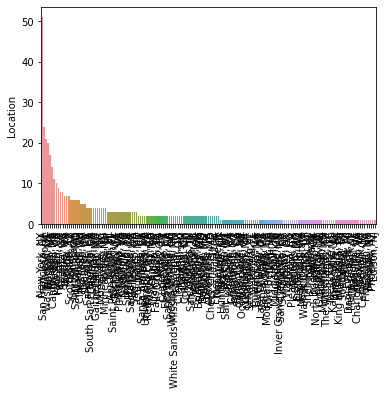

graph for Headquarters: total = 197


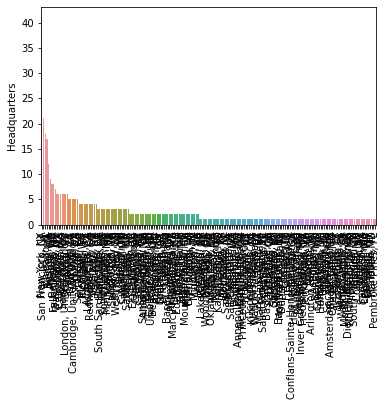

graph for Size: total = 9


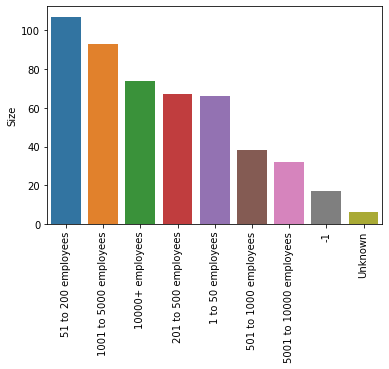

graph for Type of ownership: total = 12


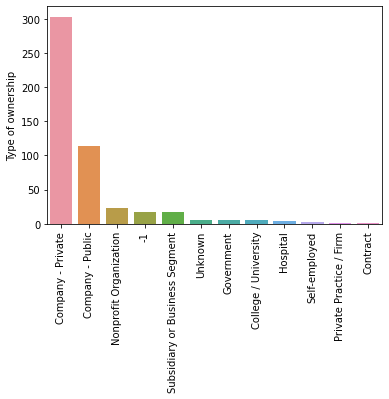

graph for Industry: total = 58


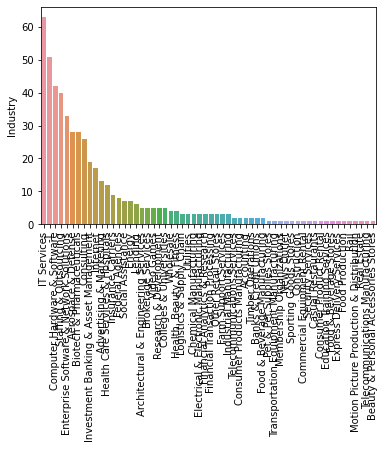

graph for Sector: total = 23


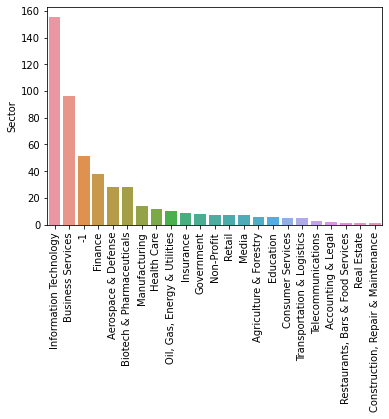

graph for Revenue: total = 14


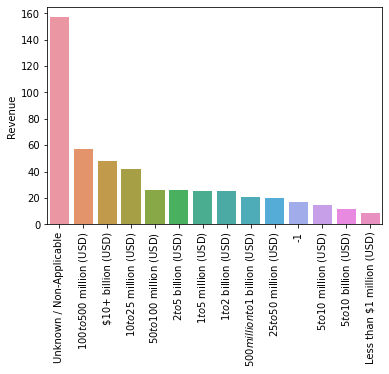

graph for company_txt: total = 369


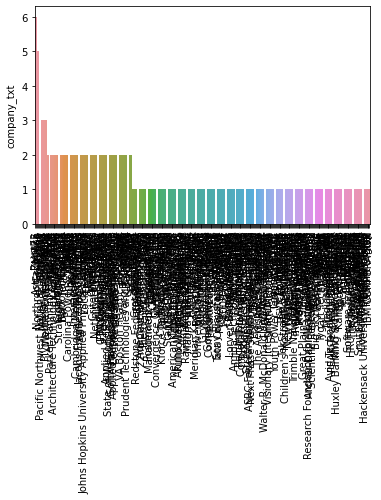

graph for job_state: total = 39


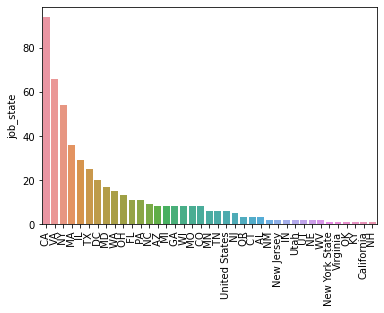

graph for same_state: total = 2


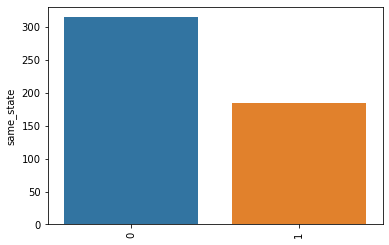

graph for python_yn: total = 2


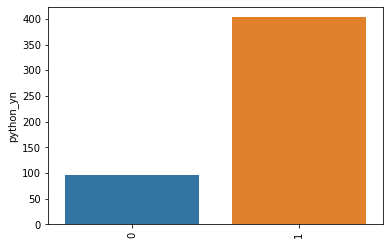

graph for R_yn: total = 2


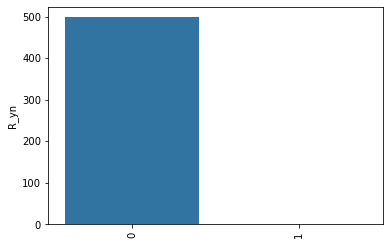

graph for spark_yn: total = 2


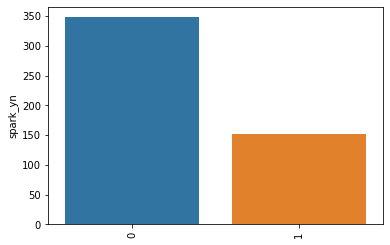

graph for aws_yn: total = 2


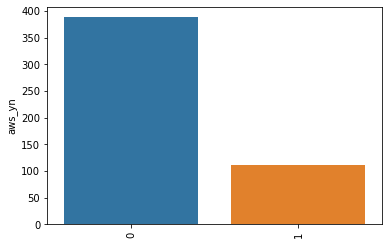

graph for excel_yn: total = 2


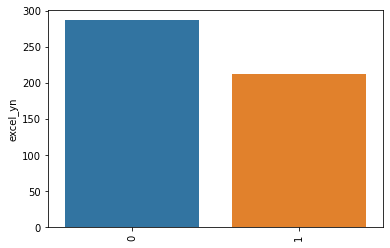

graph for job_simp: total = 3


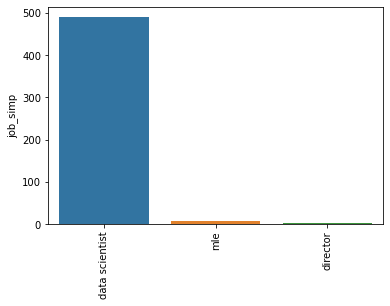

graph for seniority: total = 2


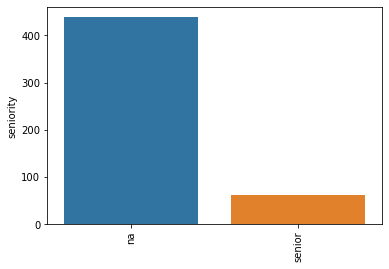

In [25]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


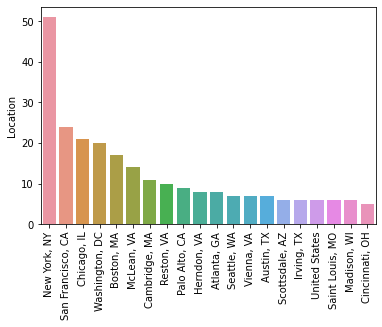

graph for Headquarters: total = 20


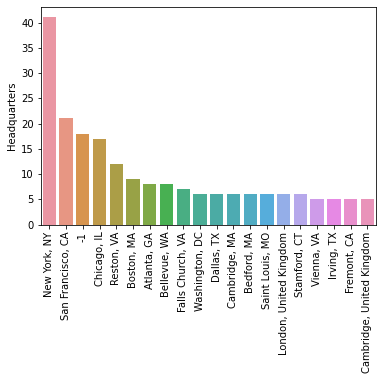

graph for company_txt: total = 20


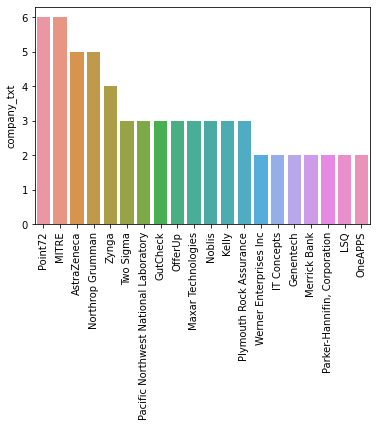

In [26]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'min _salary'],
      dtype='object')

In [28]:
pd.pivot_table(df, index='job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data scientist,115.930612
director,125.666667
mle,112.714286


In [29]:
pd.pivot_table(df, index=['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
data scientist na         115.234884
               senior     120.916667
director       na         108.000000
               senior     161.000000
mle            na         112.714286

In [30]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state', ascending=False)

,,avg_salary
job_state,job_simp,
Virginia,data scientist,104.500000
Utah,data scientist,127.250000
United States,data scientist,107.333333
New York State,data scientist,148.500000
New Jersey,data scientist,100.500000
California,data scientist,113.500000
WV,data scientist,116.500000
WI,data scientist,118.312500
WA,data scientist,119.866667


In [31]:
#rating industry, secotr, revenue, number of comp, hourly, employer provided, python r, spark aws, excel, desc_len, type of ownership
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'min _salary'],
      dtype='object')

In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'Employer Provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [33]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.0    148.500000
 3.8    121.421875
 3.1    120.681818
 3.3    119.722222
 3.9    118.764706
 4.1    118.720000
 3.5    118.576923
 3.7    118.555556
 4.0    118.258065
 5.0    117.666667
 3.2    117.409091
-1.0    117.333333
 4.8    116.466667
 3.4    115.861111
 2.6    115.625000
 4.2    113.631579
 3.0    113.600000
 4.6    113.500000
 4.9    113.400000
 4.3    111.062500
 2.2    110.833333
 4.5    110.482143
 3.6    110.456522
 2.8    110.045455
 2.9    109.944444
 2.5    109.250000
 2.7    109.000000
 4.7    107.272727
 4.4    106.863636
 1.6    104.500000
Industry
                                          avg_salary
Industry                                            
News Outlet                               148.500000
Transportation Equipment Manufacturing    148.500000
Construction                              148.500000
Casual Restaurants                        148.500000
Commercial Equipment Rental               143.000000
Timbe

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
pd.pivot_table(df_pivots, index= 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),8,17
$1 to $5 million (USD),5,20
$10 to $25 million (USD),9,33
$10+ billion (USD),6,42
$100 to $500 million (USD),8,49
$2 to $5 billion (USD),4,22
$25 to $50 million (USD),5,15
$5 to $10 billion (USD),6,6
$5 to $10 million (USD),3,12


In [35]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [36]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

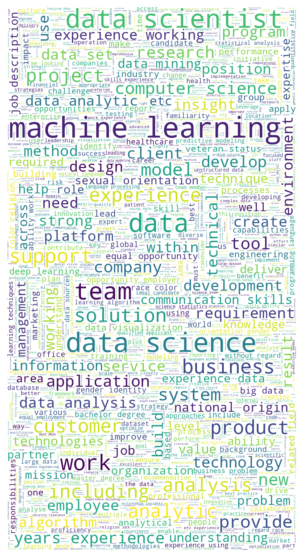

In [40]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """removing punctuation and stop words """
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()